<a href="https://colab.research.google.com/github/Blackcurrant06/MachineLearning/blob/main/Week7/Boosting_or_Bagging_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd

try:
    df_income = pd.read_csv('income.csv')
    df_citarum = pd.read_csv('CitarumWater.csv')
    df_heart = pd.read_csv('HeartDisease.csv')

    display(df_income.head())
    print(df_income.shape)

    display(df_citarum.head())
    print(df_citarum.shape)

    display(df_heart.head())
    print(df_heart.shape)

except FileNotFoundError:
    print("Error: One or more CSV files not found.")
except pd.errors.ParserError:
    print("Error: Issue parsing one or more CSV files. Check file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


(48842, 15)


,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55°C,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55°C,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55°C,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55°C,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55°C,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,-,2.44,2


(2500, 16)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


(303, 14)


In [20]:
# Explore df_income
print("df_income:")
display(df_income.info())
display(df_income.describe())
for col in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']:
    print(f"\nUnique values in {col}:")
    display(df_income[col].value_counts())

# Identify target variable for df_income: 'income' (predicting income level)
print("\nTarget variable for df_income: 'income' (categorical)")

# Missing value handling plan for df_income:  Impute missing values in 'workclass', 'occupation', 'native-country' with the mode.
print("\nMissing value handling plan for df_income:")
print("Impute missing values in 'workclass', 'occupation', 'native-country' with the mode.")

# Explore df_citarum
print("\ndf_citarum:")
display(df_citarum.info())
display(df_citarum.describe())
for col in ['NamaSungai', 'TitikPantau', 'Class']:
    print(f"\nUnique values in {col}:")
    display(df_citarum[col].value_counts())

# Identify target variable for df_citarum: 'Class' (water quality class)
print("\nTarget variable for df_citarum: 'Class' (categorical)")

# Missing value handling plan for df_citarum: Impute missing values in 'FecalColiform', 'Nitrat', 'Fosfat' with the mean.
print("\nMissing value handling plan for df_citarum:")
print("Impute missing values in 'FecalColiform', 'Nitrat', 'Fosfat' with the mean.")

# Explore df_heart
print("\ndf_heart:")
display(df_heart.info())
display(df_heart.describe())
for col in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']:
    print(f"\nUnique values in {col}:")
    display(df_heart[col].value_counts())

# Identify target variable for df_heart: 'num' (diagnosis of heart disease)
print("\nTarget variable for df_heart: 'num' (categorical)")

# Missing value handling plan for df_heart: Impute missing values in 'ca' and 'thal' with the mode.
print("\nMissing value handling plan for df_heart:")
print("Impute missing values in 'ca' and 'thal' with the mode.")

df_income:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


None

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000



Unique values in workclass:


,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
State-gov,1981
?,1836
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10



Unique values in education:


,count
education,
HS-grad,15784
Some-college,10878
Bachelors,8025
Masters,2657
Assoc-voc,2061
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,955



Unique values in marital-status:


,count
marital-status,
Married-civ-spouse,22379
Never-married,16117
Divorced,6633
Separated,1530
Widowed,1518
Married-spouse-absent,628
Married-AF-spouse,37



Unique values in occupation:


,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
Transport-moving,2355
Handlers-cleaners,2072



Unique values in relationship:


,count
relationship,
Husband,19716
Not-in-family,12583
Own-child,7581
Unmarried,5125
Wife,2331
Other-relative,1506



Unique values in race:


,count
race,
White,41762
Black,4685
Asian-Pac-Islander,1519
Amer-Indian-Eskimo,470
Other,406



Unique values in sex:


,count
sex,
Male,32650
Female,16192



Unique values in native-country:


,count
native-country,
United-States,43832
Mexico,951
?,583
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151



Unique values in income:


,count
income,
<=50K,24720
<=50K.,12435
>50K,7841
>50K.,3846



Target variable for df_income: 'income' (categorical)

Missing value handling plan for df_income:
Impute missing values in 'workclass', 'occupation', 'native-country' with the mode.

df_citarum:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             2500 non-null   int64  
 1   NamaSungai     2500 non-null   object 
 2   TitikPantau    2500 non-null   object 
 3   Waktu          2500 non-null   object 
 4   pH             2500 non-null   float64
 5   Temp           2500 non-null   object 
 6   TSS            2500 non-null   float64
 7   DO             2500 non-null   float64
 8   BOD            2500 non-null   float64
 9   COD            2500 non-null   float64
 10  Nitrat         2500 non-null   float64
 11  FecalColiform  2500 non-null   float64
 12  Fosfat         2500 non-null   float64
 13  O2             2500 non-null   o

None

,No,pH,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,IP,Class
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000
mean,1250.50000,7.032305,27.856368,3.882005,4.005476,20.511768,1.970393,1.418937e+04,0.074547,1.365796,1.650000
std,721.83216,0.578179,10.551351,2.249329,2.697375,8.969809,1.175104,2.526550e+05,0.320970,1.220703,0.547375
min,1.00000,6.002441,5.000000,0.002140,1.640000,5.440000,0.003784,5.000000e+01,0.004300,0.430000,1.000000
25%,625.75000,6.520722,23.597278,1.925925,2.754331,14.999275,0.955443,2.924867e+02,0.048199,0.840000,1.000000
50%,1250.50000,7.056001,27.671133,3.892147,3.800133,20.044252,1.920408,5.375973e+02,0.065606,1.170000,2.000000
75%,1875.25000,7.531846,31.747063,5.828533,4.947965,25.155492,3.014985,7.829760e+02,0.083315,1.570000,2.000000
max,2500.00000,8.710000,318.000000,7.800000,55.300000,190.000000,5.240000,9.200000e+06,16.000000,14.900000,4.000000



Unique values in NamaSungai:


,count
NamaSungai,
Citarum,2500



Unique values in TitikPantau:


,count
TitikPantau,
Wangisagara,314
Koyod,314
Setelah IPAL Cisirung,314
Nanjung,314
Outlet Waduk Jatiluhur,313
Bendung Walahar,313
Tunggak Jati,313
Cisanti,305



Unique values in Class:


,count
Class,
2,1496
1,948
3,39
4,17



Target variable for df_citarum: 'Class' (categorical)

Missing value handling plan for df_citarum:
Impute missing values in 'FecalColiform', 'Nitrat', 'Fosfat' with the mean.

df_heart:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


None

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000



Unique values in sex:


,count
sex,
1,206
0,97



Unique values in cp:


,count
cp,
4,144
3,86
2,50
1,23



Unique values in fbs:


,count
fbs,
0,258
1,45



Unique values in restecg:


,count
restecg,
0,151
2,148
1,4



Unique values in exang:


,count
exang,
0,204
1,99



Unique values in slope:


,count
slope,
1,142
2,140
3,21



Unique values in ca:


,count
ca,
0.0,176
1.0,65
2.0,38
3.0,20



Unique values in thal:


,count
thal,
3.0,166
7.0,117
6.0,18



Unique values in num:


,count
num,
0,164
1,55
2,36
3,35
4,13



Target variable for df_heart: 'num' (categorical)

Missing value handling plan for df_heart:
Impute missing values in 'ca' and 'thal' with the mode.


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# --- df_income ---
# Impute missing values
imputer_income = SimpleImputer(strategy='most_frequent')
cols_to_impute_income = ['workclass', 'occupation', 'native-country']
df_income[cols_to_impute_income] = imputer_income.fit_transform(df_income[cols_to_impute_income])

# Encode categorical features
categorical_cols_income = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
encoder_income = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_income = encoder_income.fit_transform(df_income[categorical_cols_income])
encoded_df_income = pd.DataFrame(encoded_income, columns=encoder_income.get_feature_names_out(categorical_cols_income))
df_income = df_income.drop(categorical_cols_income, axis=1)
df_income = pd.concat([df_income, encoded_df_income], axis=1)

# Scale numerical features
scaler_income = StandardScaler()
numerical_cols_income = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df_income[numerical_cols_income] = scaler_income.fit_transform(df_income[numerical_cols_income])

# Split data
X_income = df_income.drop('income', axis=1)
y_income = df_income['income']
X_income_train, X_income_test, y_income_train, y_income_test = train_test_split(X_income, y_income, test_size=0.2, random_state=42)


# --- df_citarum ---
# Impute missing values (if any)
imputer_citarum = SimpleImputer(strategy='mean')
cols_to_impute_citarum = ['FecalColiform', 'Nitrat', 'Fosfat']
df_citarum[cols_to_impute_citarum] = imputer_citarum.fit_transform(df_citarum[cols_to_impute_citarum])

# Encode categorical features
categorical_cols_citarum = ['NamaSungai', 'TitikPantau']
encoder_citarum = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_citarum = encoder_citarum.fit_transform(df_citarum[categorical_cols_citarum])
encoded_df_citarum = pd.DataFrame(encoded_citarum, columns=encoder_citarum.get_feature_names_out(categorical_cols_citarum))
df_citarum = df_citarum.drop(categorical_cols_citarum, axis=1)
df_citarum = pd.concat([df_citarum, encoded_df_citarum], axis=1)

# Scale numerical features
numerical_cols_citarum = ['pH', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'IP', 'No']
scaler_citarum = StandardScaler()
df_citarum[numerical_cols_citarum] = scaler_citarum.fit_transform(df_citarum[numerical_cols_citarum])
# Convert 'Waktu' to datetime
df_citarum['Waktu'] = pd.to_datetime(df_citarum['Waktu'], format='%d/%m/%Y', errors='coerce')
df_citarum['Waktu'] = df_citarum['Waktu'].astype(int) / 10**9

# Split data
X_citarum = df_citarum.drop('Class', axis=1)
y_citarum = df_citarum['Class']
X_citarum_train, X_citarum_test, y_citarum_train, y_citarum_test = train_test_split(X_citarum, y_citarum, test_size=0.2, random_state=42)

# --- df_heart ---
# Impute missing values
imputer_heart = SimpleImputer(strategy='most_frequent')
cols_to_impute_heart = ['ca', 'thal']
df_heart[cols_to_impute_heart] = imputer_heart.fit_transform(df_heart[cols_to_impute_heart])

# Encode categorical features
categorical_cols_heart = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
encoder_heart = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_heart = encoder_heart.fit_transform(df_heart[categorical_cols_heart])
encoded_df_heart = pd.DataFrame(encoded_heart, columns=encoder_heart.get_feature_names_out(categorical_cols_heart))
df_heart = df_heart.drop(categorical_cols_heart, axis=1)
df_heart = pd.concat([df_heart, encoded_df_heart], axis=1)


# Scale numerical features
numerical_cols_heart = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler_heart = StandardScaler()
df_heart[numerical_cols_heart] = scaler_heart.fit_transform(df_heart[numerical_cols_heart])

# Split data
X_heart = df_heart.drop('num', axis=1)
y_heart = df_heart['num']
X_heart_train, X_heart_test, y_heart_train, y_heart_test = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)

In [22]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import re

# --- Income Dataset ---
le_income = LabelEncoder()
y_income_train = le_income.fit_transform(y_income_train)
y_income_test = le_income.transform(y_income_test)

xgb_income_model = XGBClassifier()
xgb_income_model.fit(X_income_train, y_income_train)

rf_income_model = RandomForestClassifier()
rf_income_model.fit(X_income_train, y_income_train)

# --- Citarum Dataset ---
# Adjust Citarum labels
y_citarum_train = y_citarum_train - 1
y_citarum_test = y_citarum_test - 1

# Convert 'Temp' column to numeric
X_citarum_train['Temp'] = X_citarum_train['Temp'].apply(lambda x: float(re.sub(r'[^\d.]', '', x)))
X_citarum_test['Temp'] = X_citarum_test['Temp'].apply(lambda x: float(re.sub(r'[^\d.]', '', x)))

# Convert 'O2' column to numeric (attempting float conversion)
X_citarum_train['O2'] = pd.to_numeric(X_citarum_train['O2'], errors='coerce')
X_citarum_test['O2'] = pd.to_numeric(X_citarum_test['O2'], errors='coerce')

xgb_citarum_model = XGBClassifier()
xgb_citarum_model.fit(X_citarum_train, y_citarum_train)

rf_citarum_model = RandomForestClassifier()
rf_citarum_model.fit(X_citarum_train, y_citarum_train)

# --- Heart Disease Dataset ---
xgb_heart_model = XGBClassifier()
xgb_heart_model.fit(X_heart_train, y_heart_train)

rf_heart_model = RandomForestClassifier()
rf_heart_model.fit(X_heart_train, y_heart_train)

RandomForestClassifier()

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    try:
        auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    except ValueError:
        auc = np.nan  # Handle the error by assigning NaN to AUC if calculation fails

    return accuracy, precision, recall, f1, auc

datasets = {
    'income': (xgb_income_model, rf_income_model, X_income_test, y_income_test),
    'citarum': (xgb_citarum_model, rf_citarum_model, X_citarum_test, y_citarum_test),
    'heart': (xgb_heart_model, rf_heart_model, X_heart_test, y_heart_test),
}

results = {}
for dataset_name, (xgb_model, rf_model, X_test, y_test) in datasets.items():
    results[dataset_name] = {}

    results[dataset_name]['XGBoost'] = evaluate_model(xgb_model, X_test, y_test)
    results[dataset_name]['RandomForest'] = evaluate_model(rf_model, X_test, y_test)

    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC']
    df_results = pd.DataFrame(index=metrics)
    df_results['XGBoost'] = results[dataset_name]['XGBoost']
    df_results['RandomForest'] = results[dataset_name]['RandomForest']
    display(df_results)

,XGBoost,RandomForest
Accuracy,0.584502,0.540076
Precision,0.480813,0.423195
Recall,0.414222,0.401602
F1-score,0.376351,0.397025
AUC,0.784772,0.746249


,XGBoost,RandomForest
Accuracy,0.996000,0.998000
Precision,0.998311,0.999153
Recall,0.957058,0.998724
F1-score,0.975786,0.998936
AUC,0.999566,0.999938


,XGBoost,RandomForest
Accuracy,0.475410,0.540984
Precision,0.213889,0.458018
Recall,0.258675,0.327230
F1-score,0.233529,0.343030
AUC,0.716660,0.782821


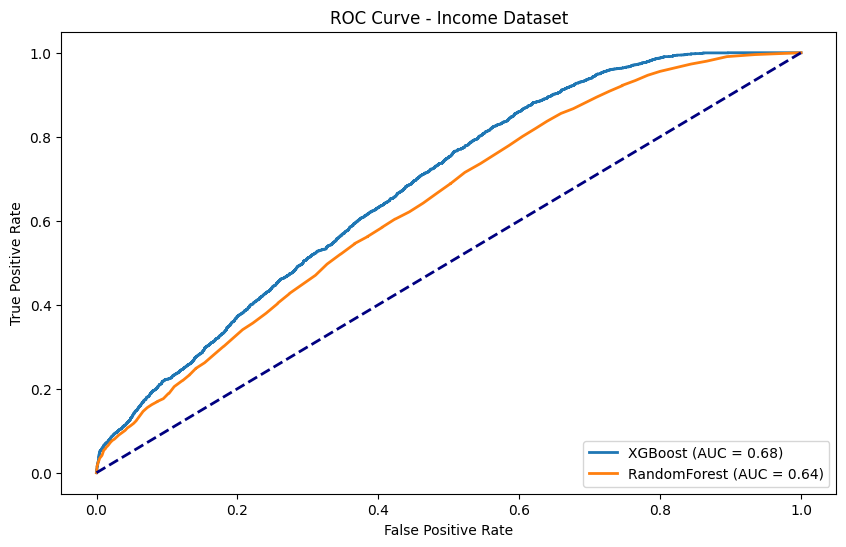

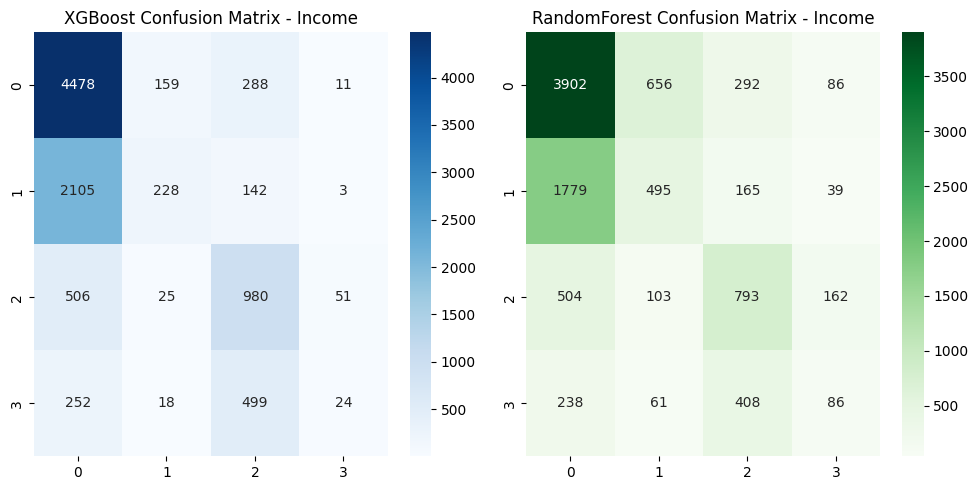

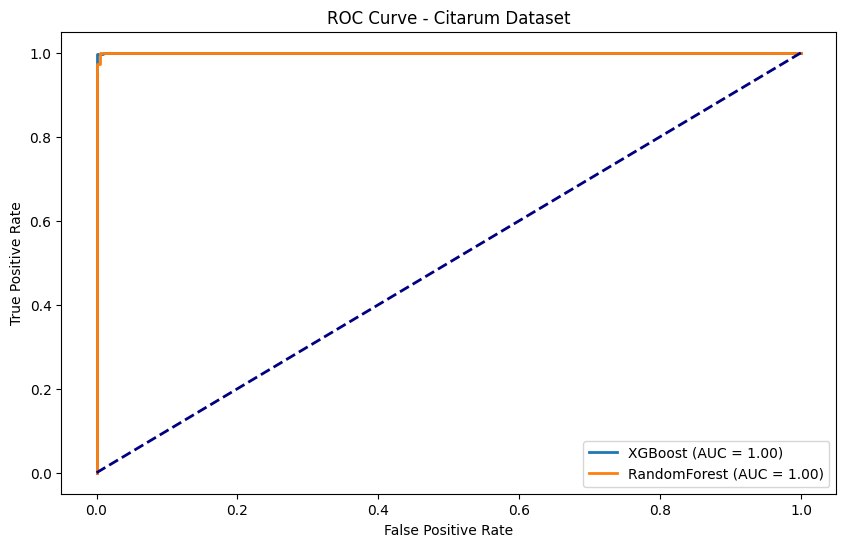

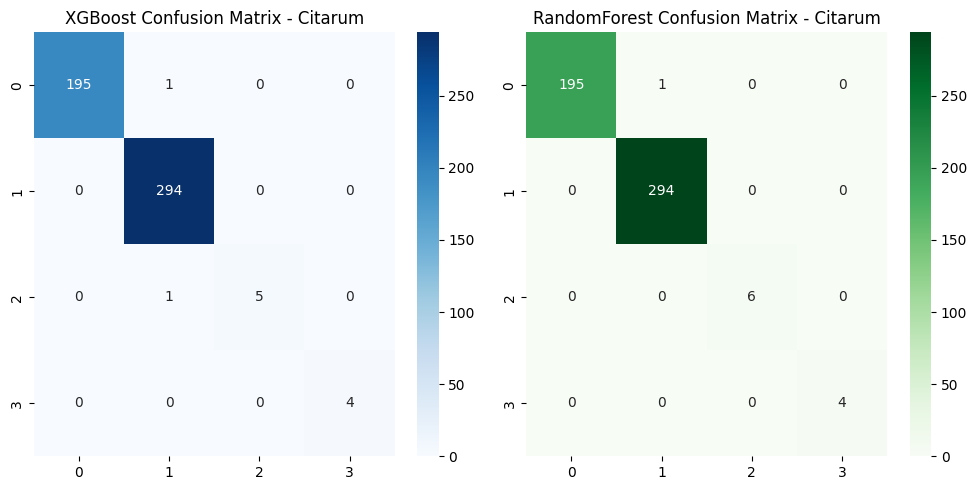

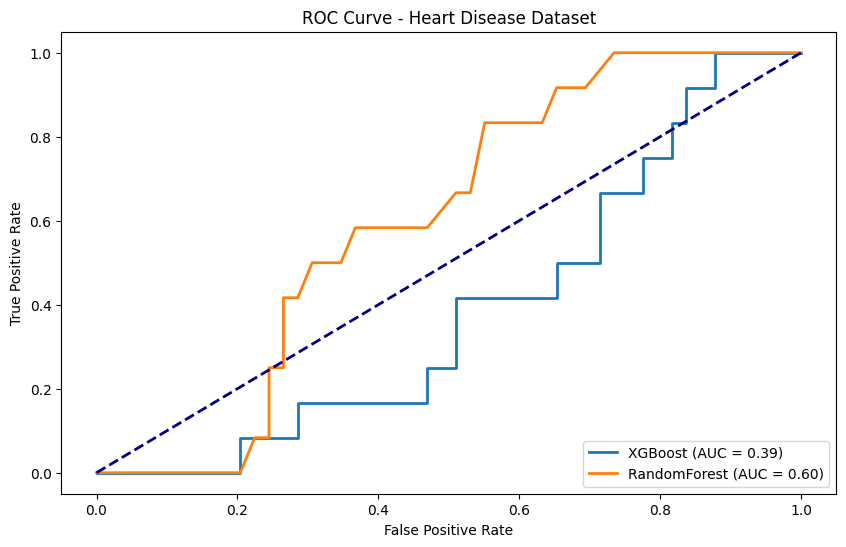

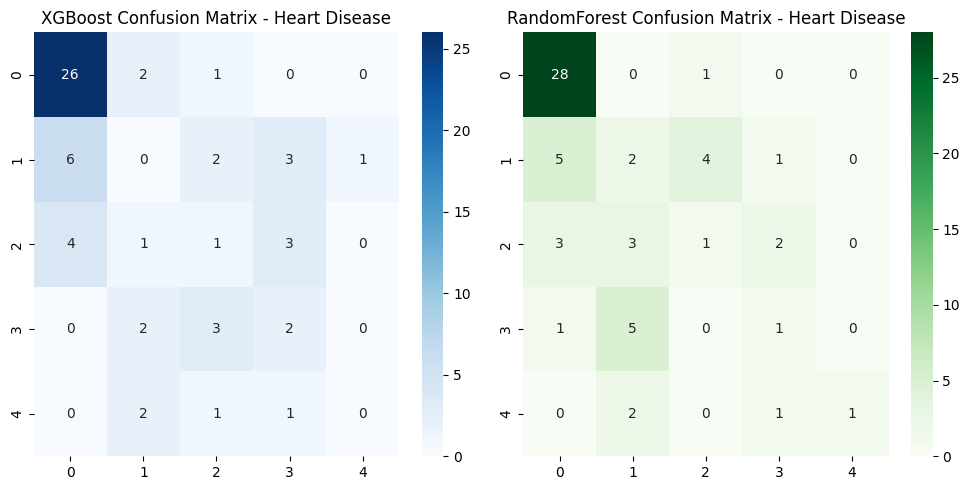

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np

# Function to plot ROC curve
def plot_roc_curve(y_true, y_prob, model_name):
    try:
        fpr, tpr, thresholds = roc_curve(y_true, y_prob[:, 1], pos_label=1)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    except ValueError:
        print(f"ROC curve for {model_name} cannot be generated due to issues in the data.")

# ... [Rest of the code to visualize feature distributions, target distributions, and confusion matrices]

# Income Dataset Visualization
plt.figure(figsize=(10, 6))
plot_roc_curve(y_income_test, xgb_income_model.predict_proba(X_income_test), "XGBoost")
plot_roc_curve(y_income_test, rf_income_model.predict_proba(X_income_test), "RandomForest")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Income Dataset')
plt.legend(loc="lower right")
plt.show()


# ... [Visualizations for other datasets and other metrics]


# Example: Confusion Matrix
cm_xgb_income = confusion_matrix(y_income_test, xgb_income_model.predict(X_income_test))
cm_rf_income = confusion_matrix(y_income_test, rf_income_model.predict(X_income_test))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_xgb_income, annot=True, fmt="d", cmap="Blues")
plt.title('XGBoost Confusion Matrix - Income')
plt.subplot(1, 2, 2)
sns.heatmap(cm_rf_income, annot=True, fmt="d", cmap="Greens")
plt.title('RandomForest Confusion Matrix - Income')
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
# Citarum Dataset Visualization
plt.figure(figsize=(10, 6))
plot_roc_curve(y_citarum_test, xgb_citarum_model.predict_proba(X_citarum_test), "XGBoost")
plot_roc_curve(y_citarum_test, rf_citarum_model.predict_proba(X_citarum_test), "RandomForest")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Citarum Dataset')
plt.legend(loc="lower right")
plt.show()

# Example: Confusion Matrix
cm_xgb_citarum = confusion_matrix(y_citarum_test, xgb_citarum_model.predict(X_citarum_test))
cm_rf_citarum = confusion_matrix(y_citarum_test, rf_citarum_model.predict(X_citarum_test))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_xgb_citarum, annot=True, fmt="d", cmap="Blues")
plt.title('XGBoost Confusion Matrix - Citarum')
plt.subplot(1, 2, 2)
sns.heatmap(cm_rf_citarum, annot=True, fmt="d", cmap="Greens")
plt.title('RandomForest Confusion Matrix - Citarum')
plt.tight_layout()
plt.show()

# Heart Disease Dataset Visualization
plt.figure(figsize=(10, 6))
plot_roc_curve(y_heart_test, xgb_heart_model.predict_proba(X_heart_test), "XGBoost")
plot_roc_curve(y_heart_test, rf_heart_model.predict_proba(X_heart_test), "RandomForest")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Heart Disease Dataset')
plt.legend(loc="lower right")
plt.show()

# Example: Confusion Matrix
cm_xgb_heart = confusion_matrix(y_heart_test, xgb_heart_model.predict(X_heart_test))
cm_rf_heart = confusion_matrix(y_heart_test, rf_heart_model.predict(X_heart_test))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_xgb_heart, annot=True, fmt="d", cmap="Blues")
plt.title('XGBoost Confusion Matrix - Heart Disease')
plt.subplot(1, 2, 2)
sns.heatmap(cm_rf_heart, annot=True, fmt="d", cmap="Greens")
plt.title('RandomForest Confusion Matrix - Heart Disease')
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd

# Evaluation Metrics Summary Table
data = {
    'Dataset': ['Income', 'Citarum', 'Heart'],
    'XGBoost_Accuracy': [results['income']['XGBoost'][0], results['citarum']['XGBoost'][0], results['heart']['XGBoost'][0]],
    'RF_Accuracy': [results['income']['RandomForest'][0], results['citarum']['RandomForest'][0], results['heart']['RandomForest'][0]],
    'XGBoost_Precision': [results['income']['XGBoost'][1], results['citarum']['XGBoost'][1], results['heart']['XGBoost'][1]],
    'RF_Precision': [results['income']['RandomForest'][1], results['citarum']['RandomForest'][1], results['heart']['RandomForest'][1]],
    'XGBoost_Recall': [results['income']['XGBoost'][2], results['citarum']['XGBoost'][2], results['heart']['XGBoost'][2]],
    'RF_Recall': [results['income']['RandomForest'][2], results['citarum']['RandomForest'][2], results['heart']['RandomForest'][2]],
    'XGBoost_F1': [results['income']['XGBoost'][3], results['citarum']['XGBoost'][3], results['heart']['XGBoost'][3]],
    'RF_F1': [results['income']['RandomForest'][3], results['citarum']['RandomForest'][3], results['heart']['RandomForest'][3]],
    'XGBoost_AUC': [results['income']['XGBoost'][4], results['citarum']['XGBoost'][4], results['heart']['XGBoost'][4]],
    'RF_AUC': [results['income']['RandomForest'][4], results['citarum']['RandomForest'][4], results['heart']['RandomForest'][4]],
}
df_summary = pd.DataFrame(data)
display(df_summary)

,Dataset,XGBoost_Accuracy,RF_Accuracy,XGBoost_Precision,RF_Precision,XGBoost_Recall,RF_Recall,XGBoost_F1,RF_F1,XGBoost_AUC,RF_AUC
0,Income,0.584502,0.540076,0.480813,0.423195,0.414222,0.401602,0.376351,0.397025,0.784772,0.746249
1,Citarum,0.996000,0.998000,0.998311,0.999153,0.957058,0.998724,0.975786,0.998936,0.999566,0.999938
2,Heart,0.475410,0.540984,0.213889,0.458018,0.258675,0.327230,0.233529,0.343030,0.716660,0.782821


## Penjelasan Metrik Evaluasi Klasifikasi

### **Akurasi (Accuracy)**  
`Akurasi = (TP + TN) / (TP + TN + FP + FN)`  
**Interpretasi**: Mengukur kebenaran keseluruhan model  
**Catatan**: Dapat menyesatkan pada dataset tidak seimbang  

### **Presisi (Precision)**  
`Presisi = TP / (TP + FP)`  
**Penggunaan Penting**:  
- Meminimalkan *false positive* (prediksi positif yang salah)  
- Contoh: Deteksi spam (email legit tidak boleh masuk spam)  

### **Recall (Sensitivitas)**  
`Recall = TP / (TP + FN)`  
**Penggunaan Vital**:  
- Meminimalkan *false negative* (prediksi negatif yang salah)  
- Contoh: Diagnosis penyakit (kasus sakit tidak boleh terlewat)  

### **F1-Score**  
`F1-Score = 2 × (Presisi × Recall) / (Presisi + Recall)`  
**Keunggulan**:  
- Menyeimbangkan presisi dan recall  
- Ideal untuk dataset tidak seimbang  

### **AUC (Area Under ROC Curve)**  
**Interpretasi**:  
- AUC = 0.5 → Performa acak (seperti tebakan)  
- AUC > 0.7 → Model baik  
- AUC > 0.9 → Model sangat baik  
**Kelebihan Utama**: Tidak terpengaruh ketidakseimbangan kelas  

---

## Panduan Pemilihan Metrik
| Metrik       | Skenario Penggunaan Ideal                  | Contoh Aplikasi                     |
|--------------|--------------------------------------------|-------------------------------------|
| **Presisi**  | Biaya *false positive* tinggi             | Verifikasi transaksi keuangan      |
| **Recall**   | Biaya *false negative* tinggi             | Diagnosa medis/kanker              |
| **F1-Score** | Keseimbangan presisi-recall diperlukan    | Moderasi konten/sentimen analisis  |
| **AUC**      | Evaluasi umum pada data tidak seimbang    | Fraud detection                    